# <font color='blue'>Machine Learning</font>

# <font color='blue'>Mini-Projeto - Agrupando Clientes Por Consumo de Energia</font>

### Especificação

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando os dados
# low_memory é um parametro para gerenciar a memória quando os dados são muito grandes.
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)

In [3]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

###### 1- Tratar os valores ausentes nos dados.

In [5]:
# Verificar se possui valores NULL
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

A variável Sub_metering_3 possui valores missing

In [6]:
# Remove as linhas que possuem valores NULL
dataset.dropna(inplace=True)
dataset.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
# Removendo as colunas de Data e Hora, pois são informações irrelevantes
dataset = dataset.iloc[0:, 2:9]

In [8]:
dataset.values

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

###### 2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.
O Conjunto de dados é muito grande para carregar em memória e causa estouro de RAM.

In [9]:
dataset_resume, _ = train_test_split(dataset, train_size = .01)

In [10]:
dataset_resume.shape

(20492, 7)

In [11]:
type(dataset_resume)

pandas.core.frame.DataFrame

In [12]:
# Aplicando a redução de dimensionalidade para 2 componentes para ser possível gerar gráficos e criar o modelo
dataset_pca = PCA(n_components =2).fit_transform(dataset_resume)

###### 3- Encontrar o melhor valor de K para esse conjunto de dados.

In [13]:
# Intervalo de valores K que será testado como número de clusters
K_value = range(2,15)

In [14]:
# Criando um modelo Kmeans para cada valor de K dentro do range através de list comprehension
# Vários modelos criados ao mesmo tempo
k_means_Models = [KMeans(n_clusters=k).fit(dataset_pca) for k in K_value]

In [15]:
# Pegando o valor centróide de cada Modelo criado acima
k_means_centroids = [i.cluster_centers_ for i in k_means_Models]

###### Plotagem gráfica com o resultado obtido com range de K Values e centróide de cada agrupamento

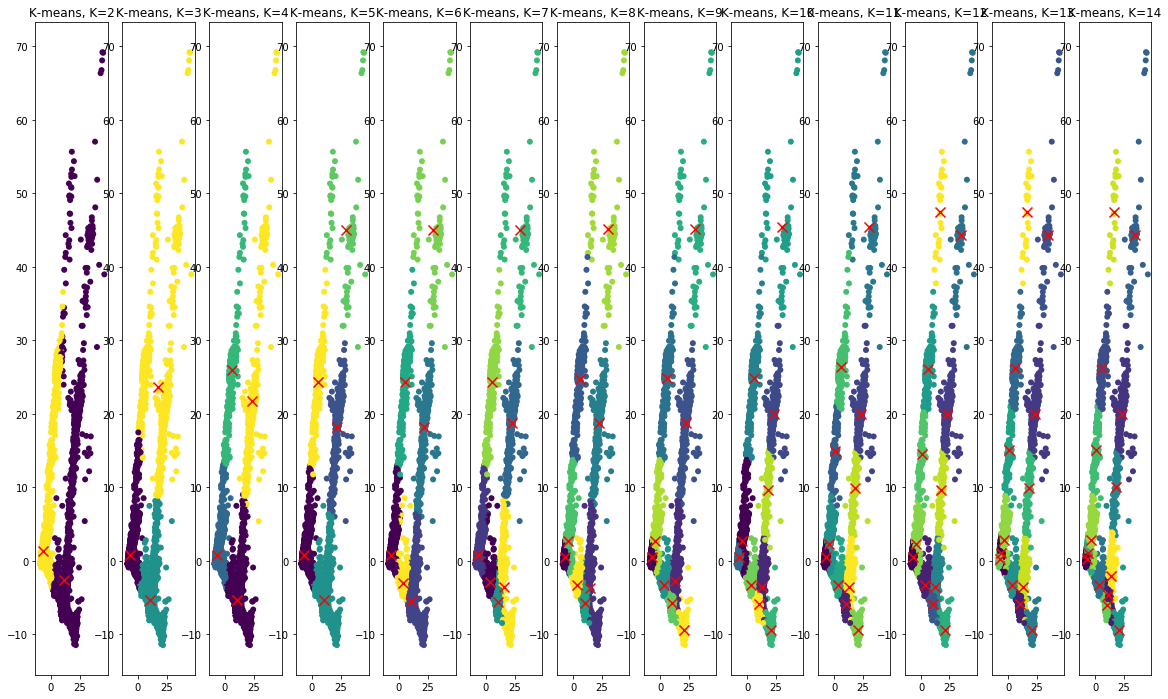

In [16]:
# Plot de todos modelos treinados
pylab.rcParams['figure.figsize'] = (20.0, 12.0)

for K in K_value:
    KMeansModel = KMeans(n_clusters=K)
    prediction = KMeansModel.fit_predict(dataset_pca)
    
    # Obter os valores de centróide
    centroide = KMeansModel.cluster_centers_
    
    plt.subplot(1, len(K_value), K-1)
    plt.title("K-means, K=%s" % K)
    plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c = prediction, edgecolors = 'none')
    plt.scatter(centroide[:,0], centroide[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4) 

###### Apresentado o valor da inércia com K Values

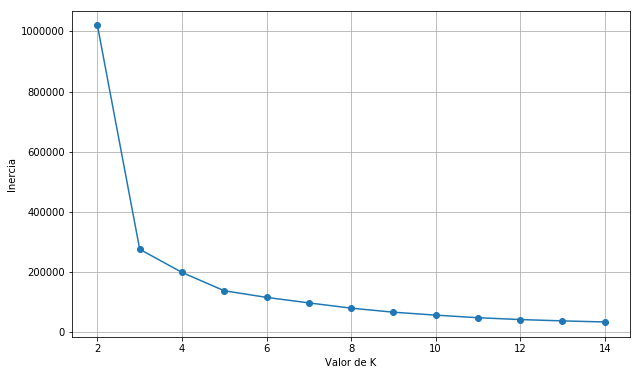

In [17]:
# Quanto menor o valor da inercia melhor é.
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

valores_metricas = []

K_value = range(2,15)

for K in K_value:
    KMeansModel = KMeans(n_clusters=K).fit(dataset_pca)
    
    valores_metricas.append(KMeansModel.inertia_)
    
plt.plot(K_value, valores_metricas, 'o-')
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Inercia")
plt.show()

O algoritmo começa a obter um bom resultado a partir de K Value >= 8

###### Criando Curva de Elbow para auxilio na identificação do melhor K value a ser utilizado.
Aumenta a Homogeneidade dentro dos dados a medida que diminiu a heterogeneidade entre os clusters.

In [18]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(dataset_pca, cent, 'euclidean') for cent in k_means_centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Soma total dos quadrados
soma_total = sum(pdist(dataset_pca)**2)/dataset_pca.shape[0]

# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

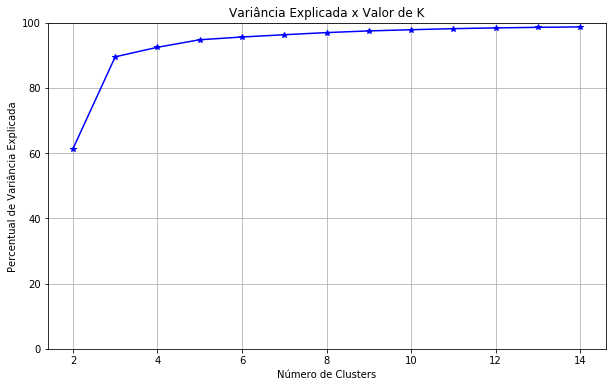

In [19]:
# Curva de Elbow
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K_value, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

É possível observar que com 2 clusters o algoritmo consegue explicar um pouco mais de 60% dos dados, já com 4 cluster quase 95% dos dados.

A partir da utilização de 8 clusters a curva começa a ficar achatada. Demonstrando pouco ganho ao acrescentar novos clusters e que o valor de K começa a fazer sentido quando >= 8.

###### 7- Calcular o Silhoutte Score
Score utilizado para medir o resultado da clusterização.

Analisando somente o resultado a partir do n_clusters >= 8.

Variação é entre -1 e 1. Sendo 1 o melhor resultado e -1 o pior resultado.

Valor = 0 representa que dados podem estar sendo sobrepostos na clusterização.

In [20]:
resultLabels = []

for i in k_means_Models[6:]:
    
    labels = i.labels_
    n_cluster = i.n_clusters
    
    resultLabels.append([n_cluster, silhouette_score(dataset_pca, labels, metric= 'euclidean')])

resultLabels

[[8, 0.6466065761361294],
 [9, 0.6396406837273041],
 [10, 0.6273489311194804],
 [11, 0.6094724314652004],
 [12, 0.6085632375635264],
 [13, 0.49211026238243594],
 [14, 0.5021546743061547]]

###### Melhor valor de K escolhido: 8

O melhor valor obtido no score silhouette foi com a parametrização n_clusters = 8.

In [31]:
# Criando o modelo final com valor de K = 8
k = 8

KMeansModelFinal = KMeans(n_clusters=k)
KMeansModelFinal.fit(dataset_pca)

prediction = KMeansModelFinal.fit_predict(dataset_pca)

###### 5- Criar um Meshgrid para visualização de todos os clusters.

In [32]:
# Obtém os valores mínimos e máximos e organiza o shape
# Adicionando um valor ao final de cada min e max para que os valores não sejam a borda do gráfico
x_min, x_max = dataset_pca[:, 0].min() - 5, dataset_pca[:, 0].max() - 1
y_min, y_max = dataset_pca[:, 1].min() + 1, dataset_pca[:, 1].max() + 5

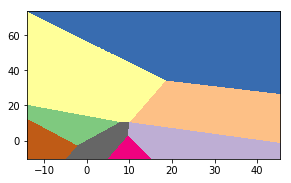

In [33]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

plt.subplot(2, 2, 1)
h = 0.02

# Retorna matrizes de coord a partir de vetores de coord
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = KMeansModelFinal.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.imshow(Z, 
           interpolation = 'nearest', 
           cmap = plt.cm.Accent,
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           aspect = 'auto', 
           origin = 'lower')

###### 6- Visualizar os centróides

Text(0.5, 1.0, 'K-means best value, K=14')

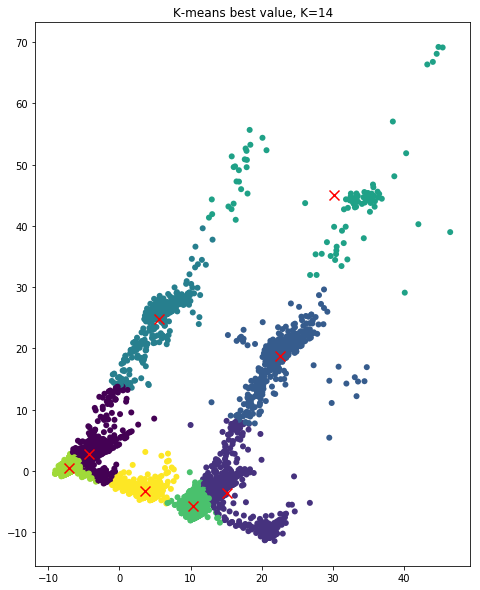

In [34]:
# Obter os valores de centróide do modelo criado
pylab.rcParams['figure.figsize'] = (120.0, 10.0)

# Obter os valores de centróide
centroide = KMeansModelFinal.cluster_centers_

plt.subplot(1, len(K_value), K-1)
plt.scatter(dataset_pca[:,0], dataset_pca[:,1], c = prediction, edgecolors = 'none')
plt.scatter(centroide[:,0],  centroide[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
plt.title("K-means best value, K=%s" % K)

###### 8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

In [35]:
# Unificando os dados de cluster com as variaveís do dataset antes da redução de dimensionalidade com PCA
# Lista com nomes das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

dataset_result = pd.DataFrame(dataset_resume, columns=names)
dataset_result['Global_active_power'] = pd.to_numeric(dataset_result['Global_active_power'])
dataset_result['Agrupamento'] = KMeansModelFinal.labels_
dataset_result.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Agrupamento
1101607,0.322,0.000,242.300,1.400,0.000,0.000,0.0,6
926750,1.616,0.160,241.840,6.600,0.000,0.000,19.0,5
797815,3.048,0.418,236.210,13.800,22.000,0.000,18.0,2
103333,1.284,0.000,240.080,5.200,0.000,0.000,18.0,5
1201826,2.078,0.068,241.230,8.600,0.000,0.000,17.0,5


In [36]:
dataset_result.groupby('Agrupamento')['Global_active_power'].mean()

Agrupamento
0    1.551492
1    3.016599
2    4.153255
3    3.007477
4    6.176268
5    1.640542
6    0.368011
7    1.082032
Name: Global_active_power, dtype: float64

###### Checando a Homogeneidade dentro do Cluster

   * Um resultado de cluster satisfaz a homogeneidade se todos os seus clusters contiverem apenas pontos de dados que são membros de uma única classe.

   * Um resultado de cluster satisfaz a completude se todos os pontos de dados que são membros de uma determinada classe são elementos do mesmo cluster.

   * Ambas as pontuações têm valores positivos entre 0,0 e 1,0, sendo desejáveis valores maiores.

   * Medida V é a média entre homogeneidade e completude.

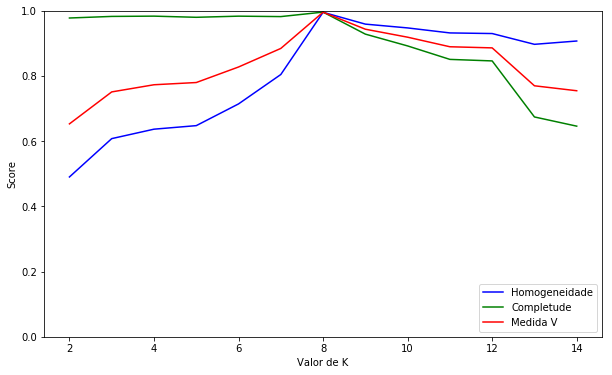

In [37]:
from sklearn.metrics import homogeneity_completeness_v_measure # usado para calcular as métricas do resultado

HCVs = []

pylab.rcParams['figure.figsize'] = (10.0, 6.0)

for K in K_value:
    # Criando o classificador e fazendo previsões sobre o cluster para cada ponto de dados
    KMeansModel = KMeans(n_clusters=K)
    prediction = KMeansModel.fit_predict(dataset_pca)
    
    # Calculando as métricas
    HCVs.append(homogeneity_completeness_v_measure(dataset_result['Agrupamento'], prediction))

    
plt.plot(K_value, [el[0] for el in HCVs], 'b', label = 'Homogeneidade')
plt.plot(K_value, [el[1] for el in HCVs], 'g', label = 'Completude')
plt.plot(K_value, [el[2] for el in HCVs], 'r', label = 'Medida V')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.ylabel("Score")
plt.legend(loc = 4)
plt.show()   